<font size = 8><b>FREQUENCY DOMAIN MIR FEATURES</b></font>

In [21]:
import matplotlib.pyplot as plt
import librosa
#import librosa.display
import IPython.display as ipd 
import numpy as np
import scipy as sp

In [14]:
# load audio files
voice_file = "Pop_voice.wav"

In [15]:
ipd.Audio(voice_file)

In [16]:
# load the files to librosa

voice, sr = librosa.load(voice_file)

In [17]:
voice.size # shows the amount of samples in the audio
#len(voice) these two commands do the same

85355

In [18]:
sample_duration = 1/sr
print(f"Duration of one sample is: {sample_duration:.6f} seconds")

Duration of one sample is: 0.000045 seconds


In [19]:
duration = sample_duration * len(voice)
print(f"Duration of signal is: {duration:.2f} seconds")

Duration of signal is: 3.87 seconds


(-1.0, 1.0)

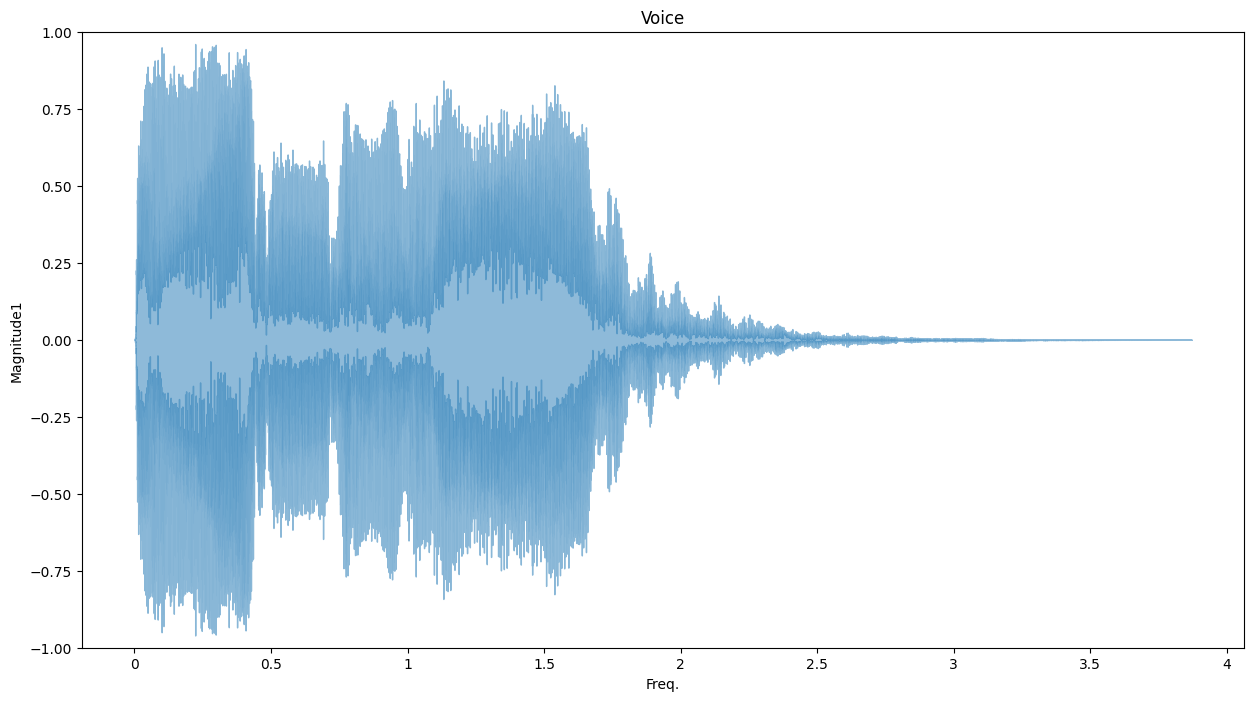

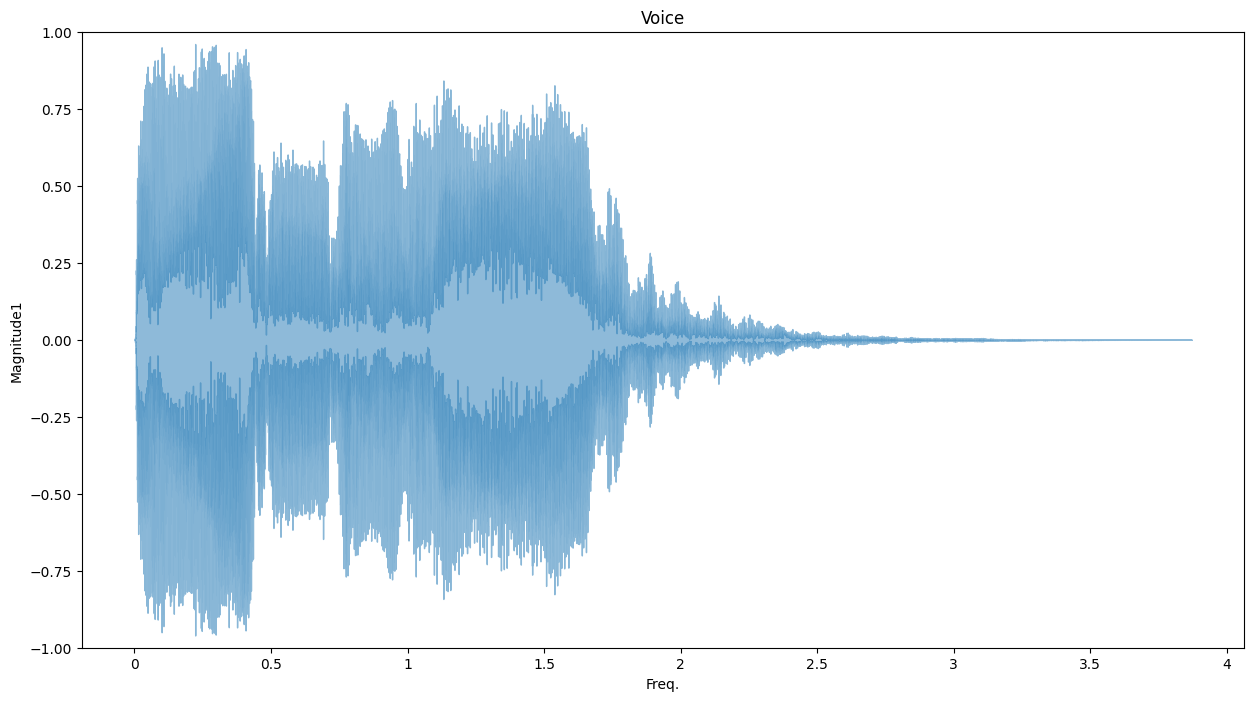

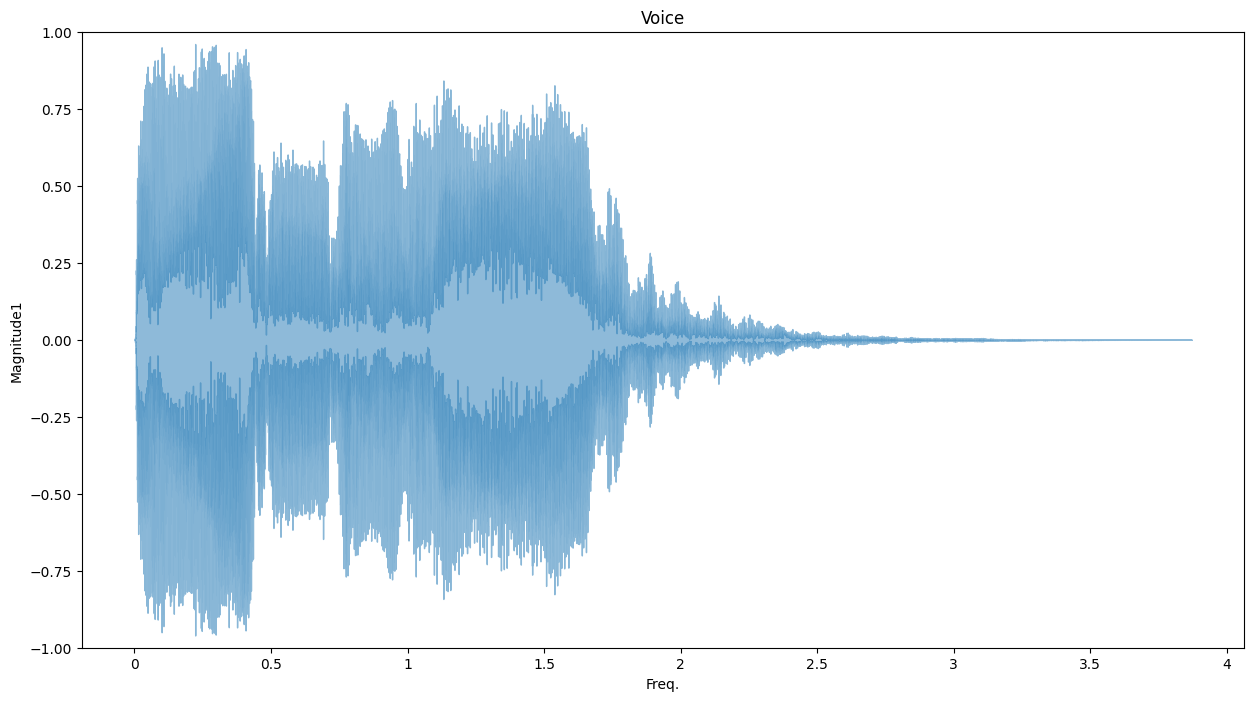

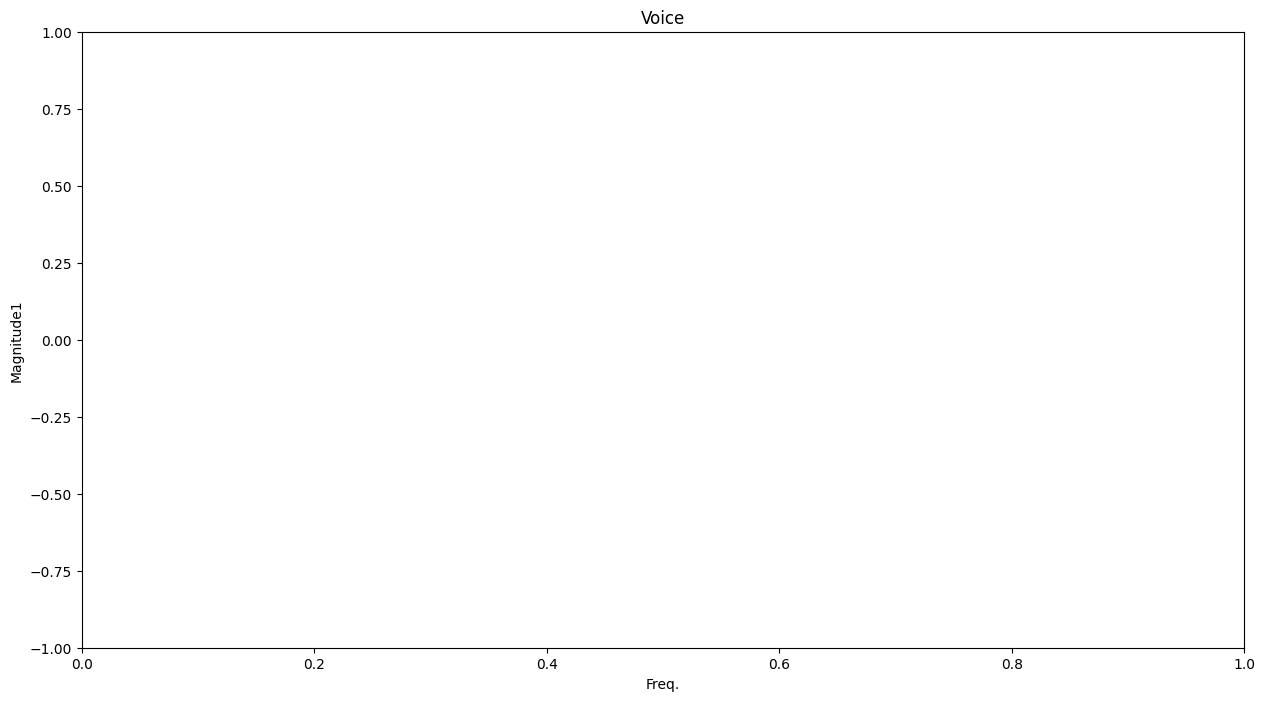

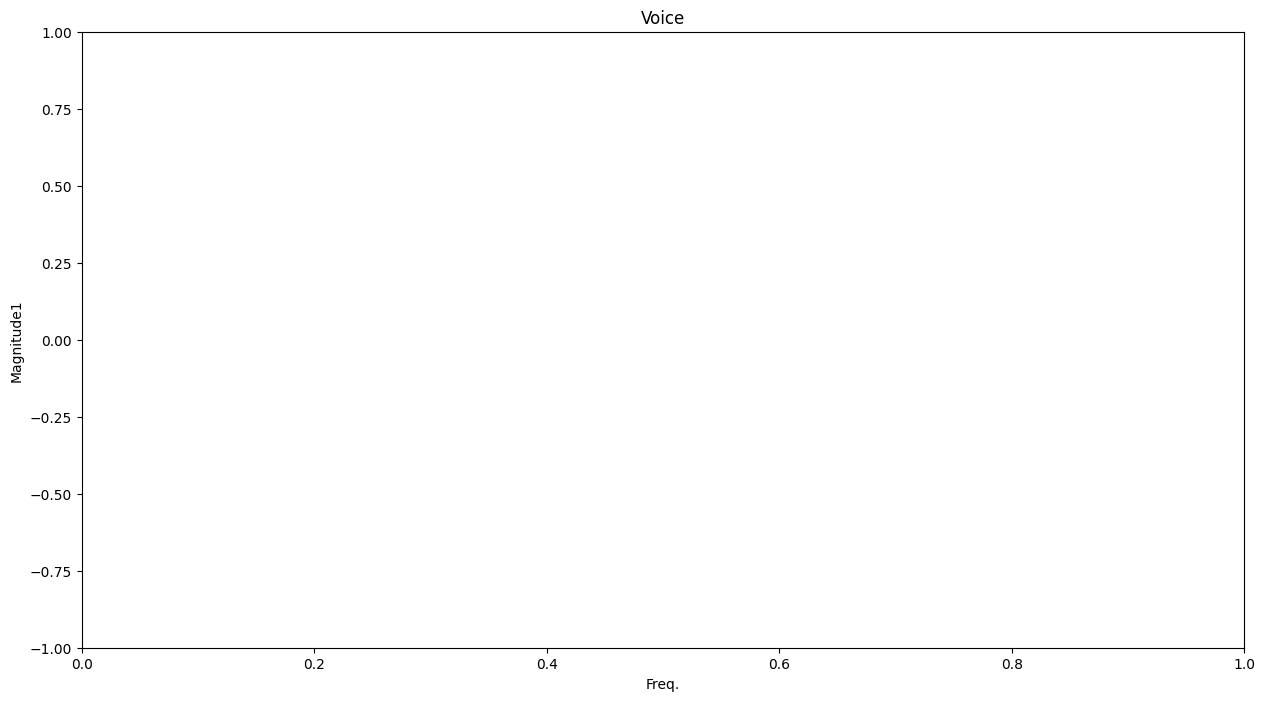

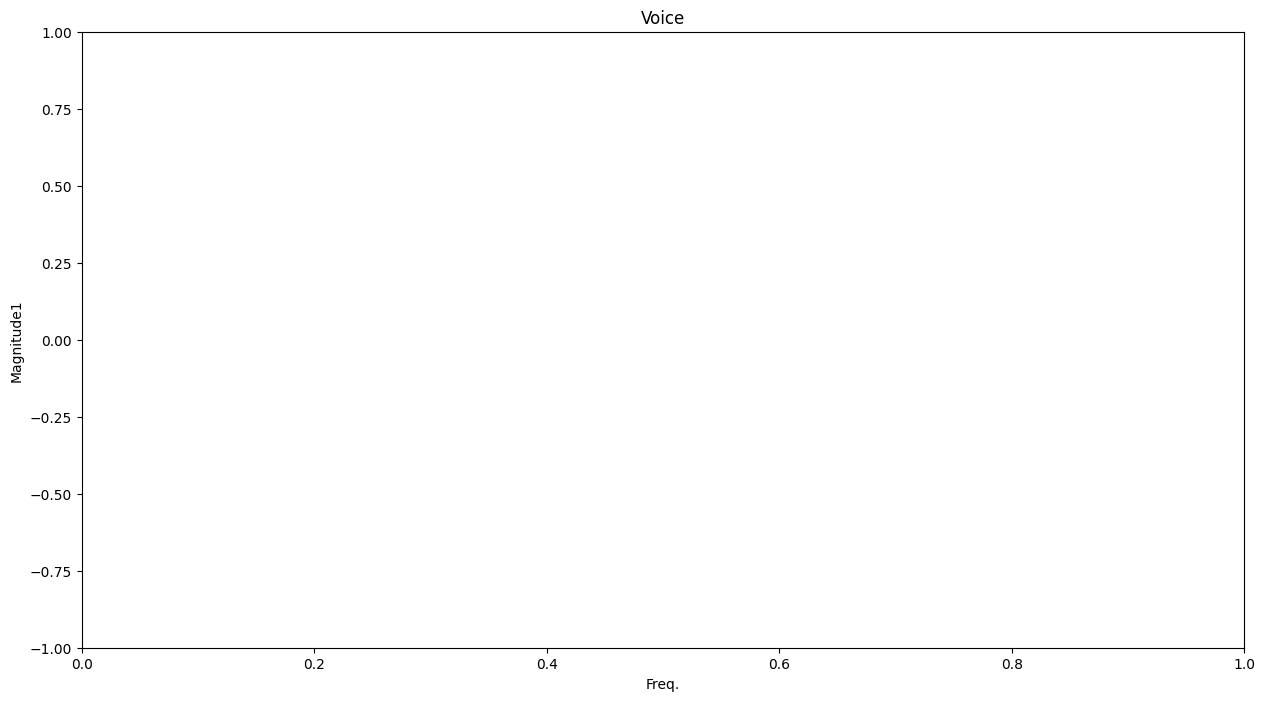

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [22]:
# waveplot with librosa

plt.figure(figsize=(15,8))

#librosa.display.waveshow(voice, alpha = 0.5)
plt.title('Voice')
plt.xlabel("Freq.")
plt.ylabel("Magnitude1")
plt.ylim (-1, 1)

<font size = 4><b>APPLYING FOURIER TRANSFORM</b></font>

In [9]:
# derive spectrum using FT
ft = sp.fft.fft(voice)
magnitude = np.absolute(ft)
frequency = np.linspace(0, sr, len(magnitude))

<font size = 4><b>PLOTTING THE SPECTRUM</b></font>

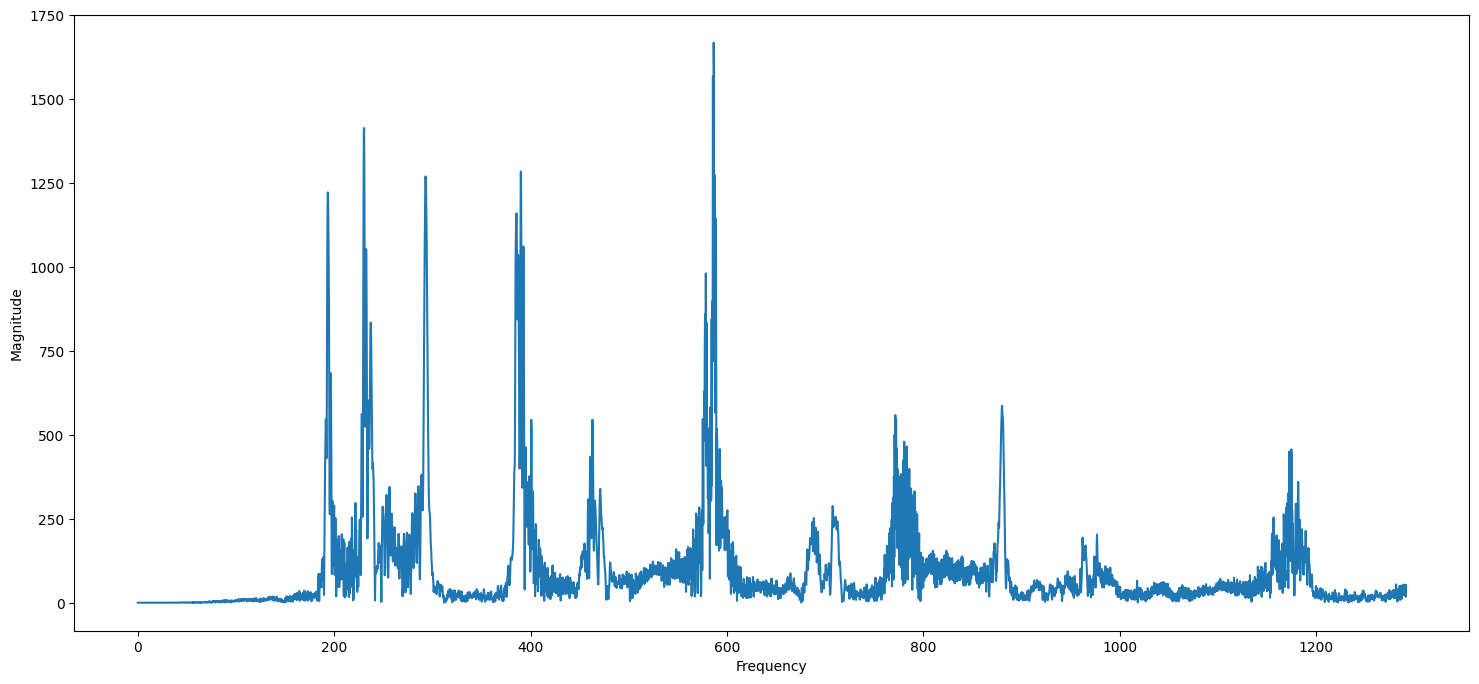

In [11]:
# plot spectrum
plt.figure(figsize=(18,8))
plt.plot(frequency[:5000], magnitude[:5000]) # slices the arguments from 0 to 5000 - magnitude spectrum
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

<font size = 4><b>ZOOMING THE SIGNAL ACCORDING TO ITS LENGTH AND THE SAMPLE RATE</b></font>

In [12]:
len(voice) #number of samples of the audio

85355

In [13]:
d = 1/sr
print(f"Duration of a sample is: {d:.26f} seconds")

Duration of a sample is: 0.00004535147392290249525977 seconds


In [14]:
d_200 = 1 / 200 #duration of a cycle of a 200Hz freq
d_200

0.005

In [15]:
d_400_samples = 400 * d # duration of 400 samples in seconds
d_400_samples

0.018140589569160998

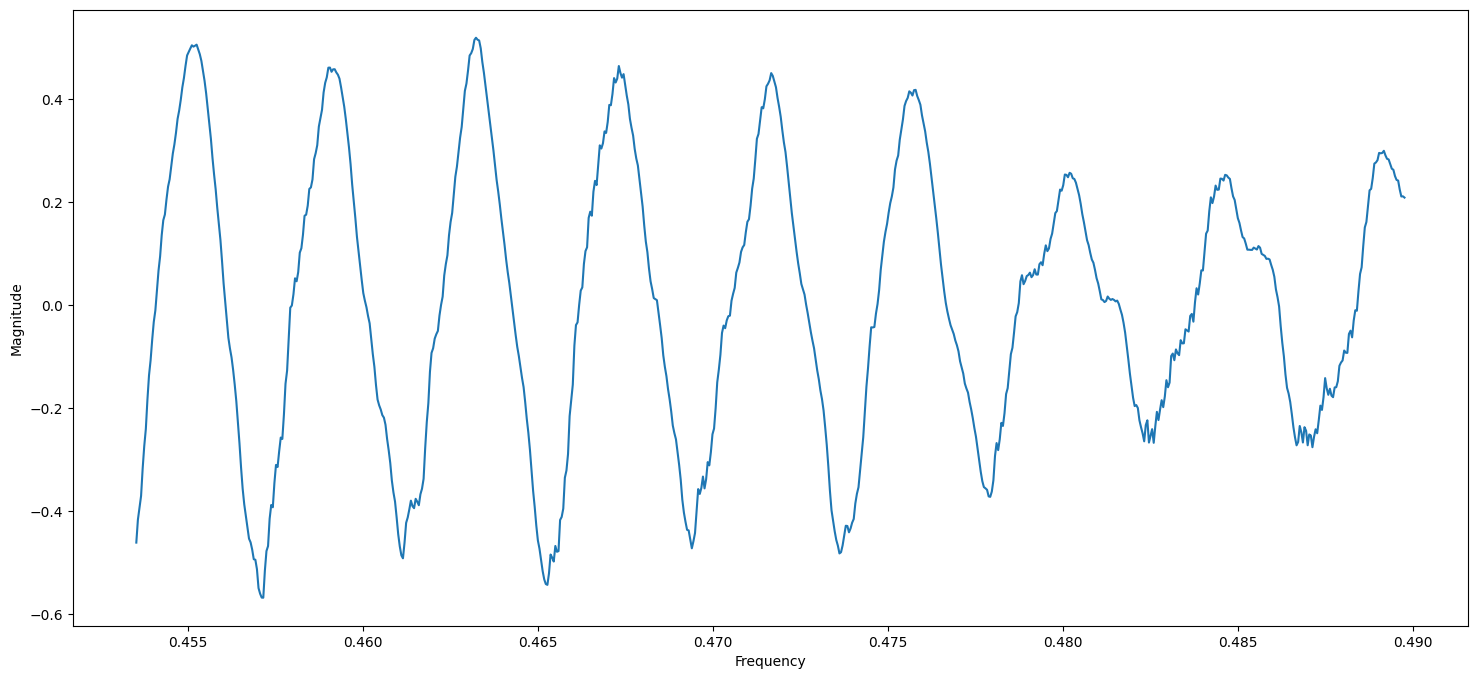

In [17]:
# zoom the waveform

samples = range(len(voice))
t = librosa.samples_to_time(samples, sr = sr)

plt.figure(figsize=(18,8))
plt.plot(t[10000:10800], voice[10000:10800])
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

<font size = 4><b>CREATING A SINUSOID AND COMPARING THE SIGNAL WITH THE SINUSOID</b></font>

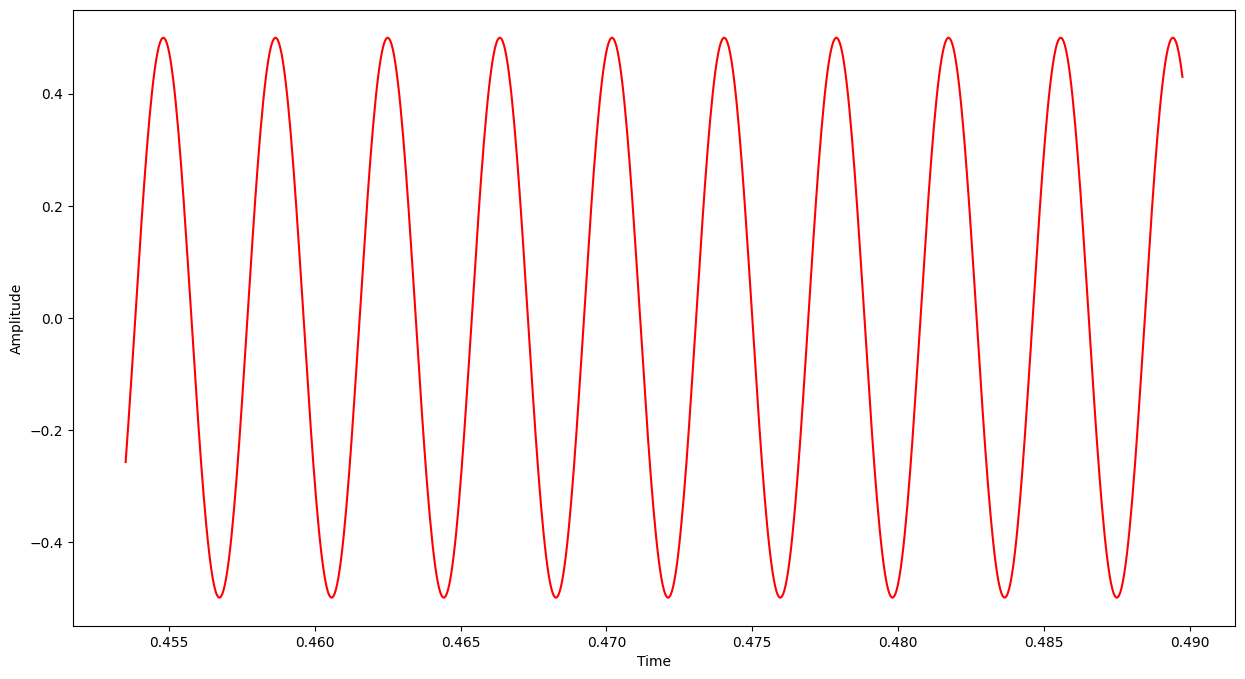

In [18]:
# create a sinusoid

f = 260 #freq of the sinusoid
phase = 0 #phase of sinusoid

sin = 0.5 * np.sin(2 * np.pi *(f * t - phase)) #equation of sinusoid

#plot of the sinusoid
plt.figure(figsize=(15,8))
plt.plot(t[10000:10800], sin[10000:10800], color="r")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

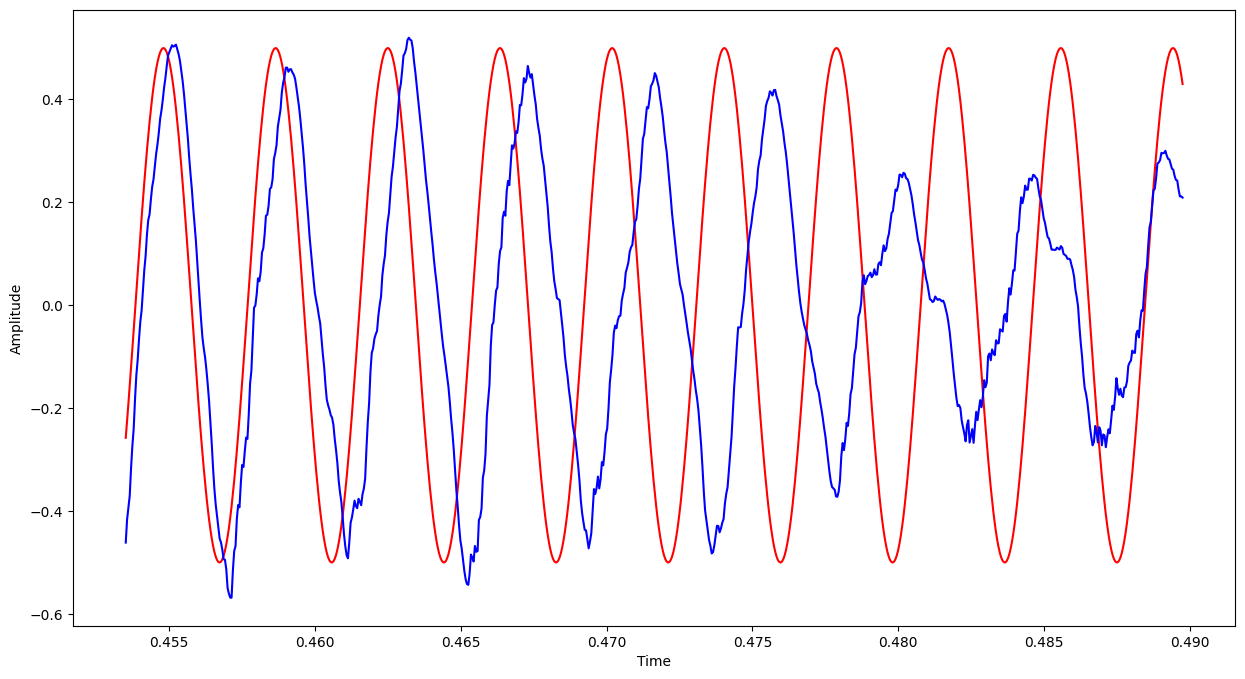

In [19]:
# compare voice and sinusoid of 260Hz

f = 260
phase = 0

sin = 0.5 * np.sin(2 * np.pi *(f * t - phase))

plt.figure(figsize=(15,8))
plt.plot(t[10000:10800], sin[10000:10800], color="r")
plt.plot(t[10000:10800], voice[10000:10800], color="b")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

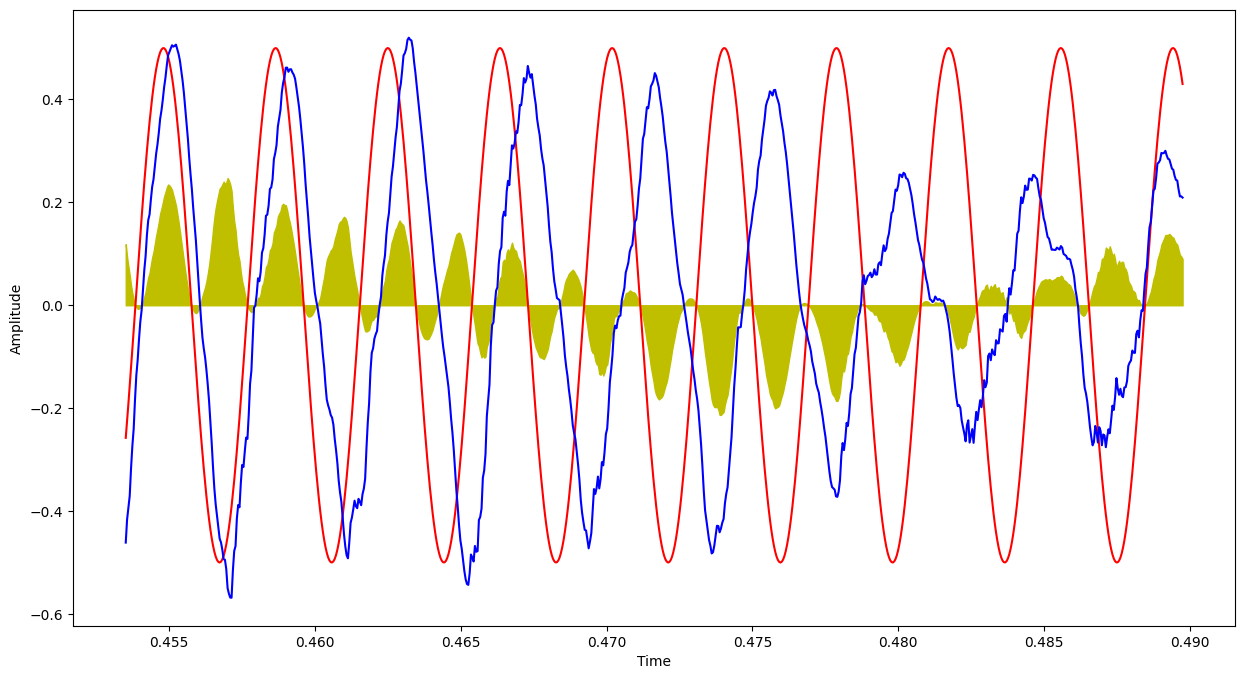

In [20]:
# compare voice and sinusoid

f = 260
phase = 0

sin = 0.5 * np.sin(2 * np.pi *(f * t - phase))

plt.figure(figsize=(15,8))
plt.plot(t[10000:10800], sin[10000:10800], color="r")
plt.plot(t[10000:10800], voice[10000:10800], color="b")
plt.xlabel("Time")
plt.ylabel("Amplitude")

#fill the differences between the two waveplots

plt.fill_between(t[10000:10800], sin[10000:10800]*voice[10000:10800], color="y")

plt.show()

<font size = 4><b>APPLYING CASE TO VIOLIN</b></font>

In [21]:
#load audio file

violin = "audio/violin_c.wav"
ipd.Audio(violin)

In [22]:
violin, sr = librosa.load(violin) # load with librosa

In [23]:
violin.size #number of samples

59772

In [24]:
d = 1/sr
d #duration of a sample

4.5351473922902495e-05

In [25]:
d_261 = 1/261 #duration of a cycle of the fundamental freq
d_261
print(f"Duration of a cycle is: {d_261:.4f} seconds") #1 cycle duration is 4 ms

Duration of a cycle is: 0.0038 seconds


In [26]:
d_100_samples = d*100 # duration of 100 samples @22Khz sr
d_100_samples 

0.0045351473922902496

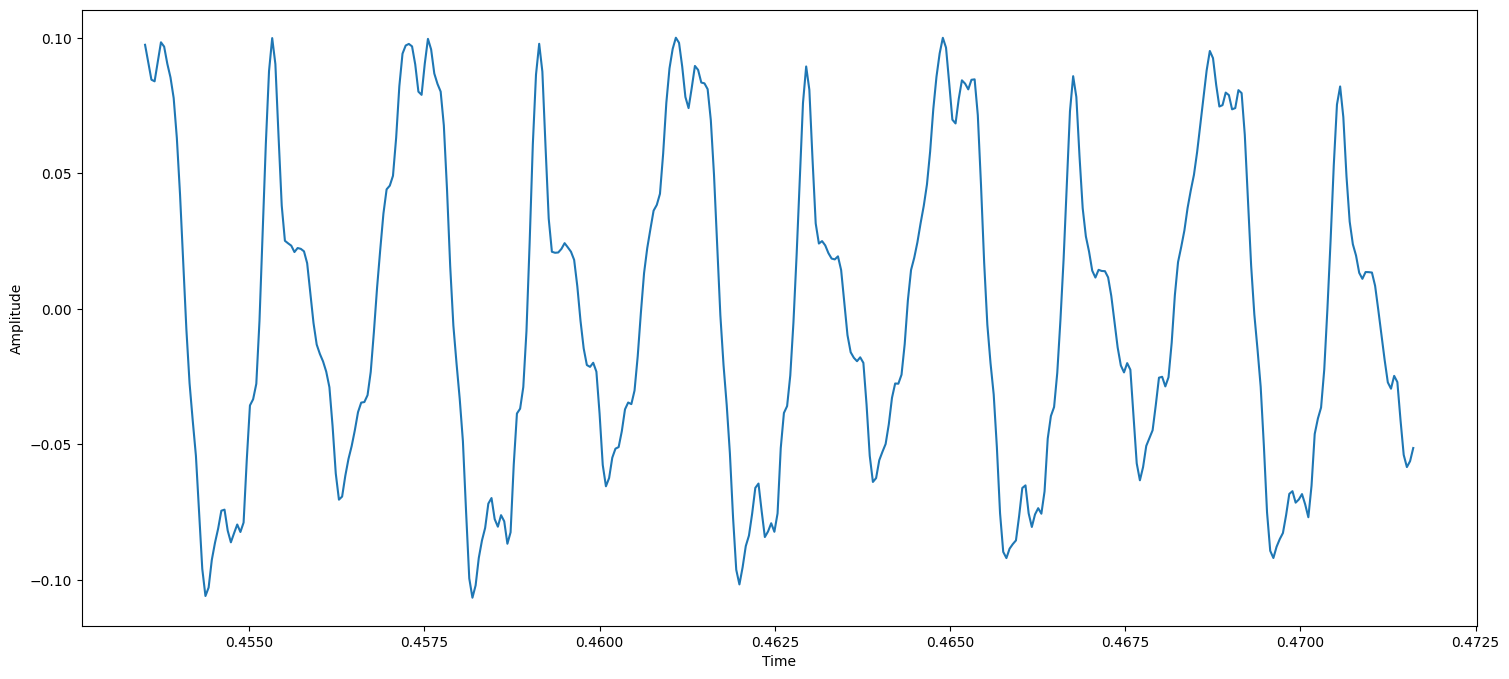

In [27]:
# zoom the waveform

samples = range(len(violin))
t = librosa.samples_to_time(samples, sr = sr)

plt.figure(figsize=(18,8))
plt.plot(t[10000:10400], violin [10000:10400]) #take only 400 samples
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

<font size = 4><b>CREATING A SINUSOID AND COMPARING THE SIGNAL WITH THE SINUSOID</b></font>

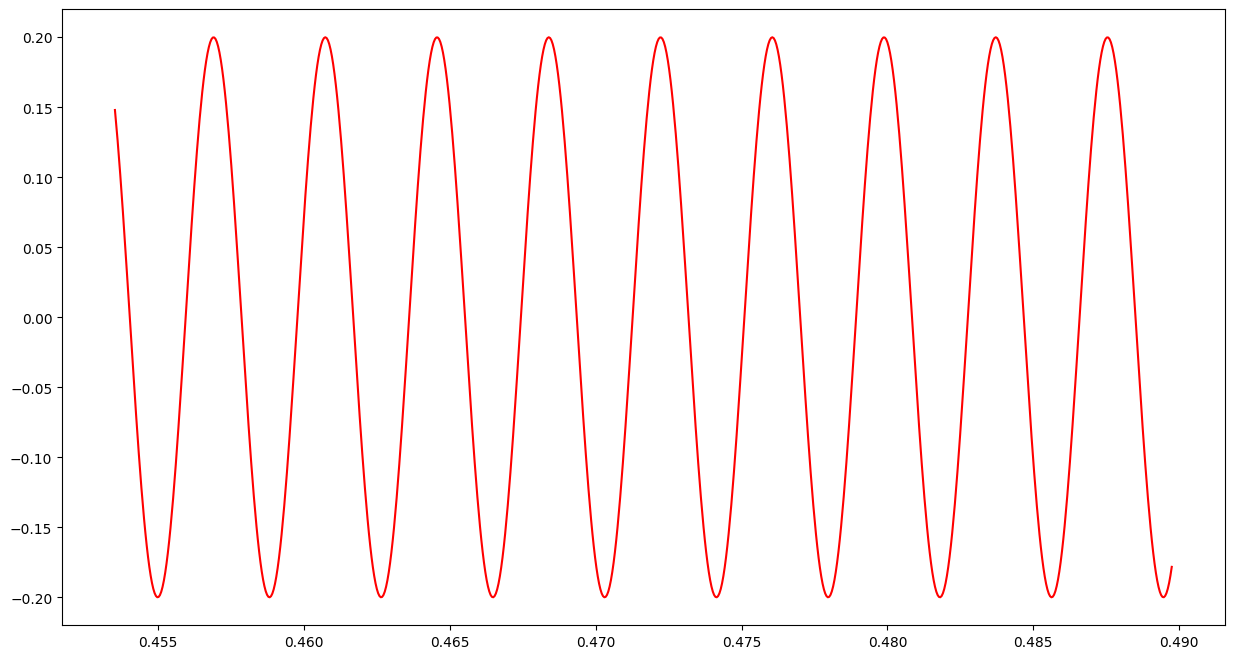

In [35]:
# create a sinusoid

f = 261 #freq of the sinusoid
phase = 0 #phase of sinusoid

sin = 0.2 * np.sin(2 * np.pi *(f * t - phase)) #equation of sinusoid

#plot of the sinusoid
plt.figure(figsize=(15,8))
plt.plot(t[10000:10800], sin[10000:10800], color="r")
#plt.xlabel('Time')
#plt.ylabel('Amplitude')
plt.show()

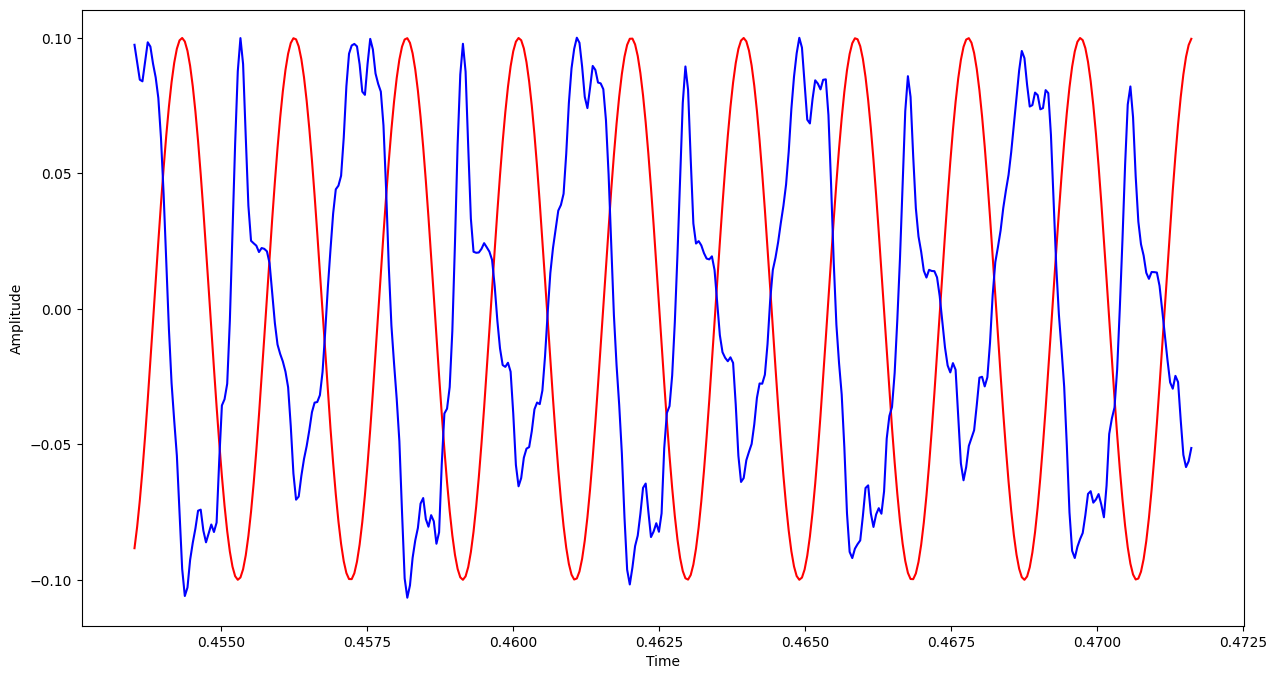

In [37]:
# compare voice and sinusoid of 260Hz

f = 520
phase = 0

sin = 0.1 * np.sin(2 * np.pi *(f * t - phase))

plt.figure(figsize=(15,8))
plt.plot(t[10000:10400], sin[10000:10400], color="r")
plt.plot(t[10000:10400], violin[10000:10400], color="b")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

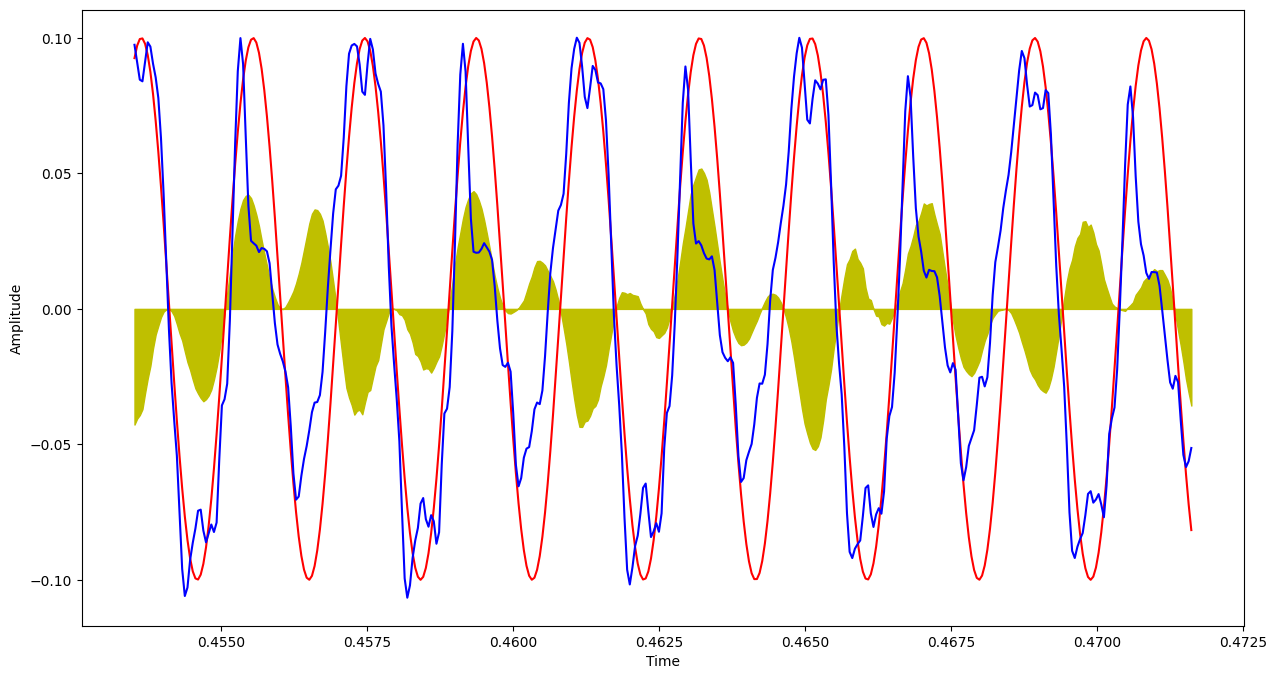

In [44]:
# compare voice and sinusoid

f = 523
phase = 0

sin = 0.1 * np.sin(2 * np.pi *(f * t - phase))

plt.figure(figsize=(15,8))
plt.plot(t[10000:10400], sin[10000:10400], color="r")
plt.plot(t[10000:10400], violin[10000:10400], color="b")
plt.xlabel("Time")
plt.ylabel("Amplitude")

#fill the differences between the two waveplots

plt.fill_between(t[10000:10400], sin[10000:10400]*voice[10000:10400], color="y")

plt.show()